In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler

In [94]:
df=pd.read_csv(r"C:\Users\balaj\Downloads\music_sample.csv") 
df

,similarity_factor,Song-Name,Singer/Artists,Genre,Album/Movie,User-Rating
0,1,Aankh Marey,"Kumar Sanu, Mika Singh, Neha Kakkar",BollywoodDance,Simmba,8.8/10
1,2,Coca Cola,"Neha Kakkar, Tony Kakkar",BollywoodDanceRomantic,Luka Chuppi,9.0/10
2,3,Apna Time Aayega,Ranveer Singh,BollywoodDance,Gully Boy,9.7/10
3,4,Mungda,"Jyotica Tangri, Shaan, Subhro Ganguly",BollywoodDance,Total Dhamaal,9.1/10
4,5,Tere Bin,"Asees Kaur, Rahat Fateh Ali Khan, Tanishk Bagchi",BollywoodRomantic,Simmba,9.2/10
...,...,...,...,...,...,...
2415,2416,Jana Tumhare Pyar Mein,Mukesh,BollywoodDance,Sasural,6.2/10
2416,2417,Tum Jaise Bigde Babu Se,Lata Mangeshkar,BollywoodDance,Jab Pyar Kisi Se Hota Hai,7.2/10
2417,2418,O Yaad Nahi Bhool Gaya,"Lata Mangeshkar, Suresh Wadkar",BollywoodDance,Lamhe,7.5/10
2418,2419,Ladi Re Ladi Tujhse Aankh Jo Ladi,Jagjit Kaur,BollywoodDance,Shola Aur Shabnam,6.5/10


In [95]:
df.isnull().sum()

similarity_factor     0
Song-Name             0
Singer/Artists       10
Genre                 0
Album/Movie           3
User-Rating           0
dtype: int64

In [96]:
df.dropna(inplace=True)

In [97]:
df.isnull().sum()

similarity_factor    0
Song-Name            0
Singer/Artists       0
Genre                0
Album/Movie          0
User-Rating          0
dtype: int64

In [98]:
df.duplicated().sum()

0

In [99]:
df=df.drop_duplicates()

In [100]:
df.duplicated().sum()

0

In [101]:
df.shape

(2407, 6)

In [102]:
df.head()

,similarity_factor,Song-Name,Singer/Artists,Genre,Album/Movie,User-Rating
0,1,Aankh Marey,"Kumar Sanu, Mika Singh, Neha Kakkar",BollywoodDance,Simmba,8.8/10
1,2,Coca Cola,"Neha Kakkar, Tony Kakkar",BollywoodDanceRomantic,Luka Chuppi,9.0/10
2,3,Apna Time Aayega,Ranveer Singh,BollywoodDance,Gully Boy,9.7/10
3,4,Mungda,"Jyotica Tangri, Shaan, Subhro Ganguly",BollywoodDance,Total Dhamaal,9.1/10
4,5,Tere Bin,"Asees Kaur, Rahat Fateh Ali Khan, Tanishk Bagchi",BollywoodRomantic,Simmba,9.2/10


In [52]:
l=[]
for i in df['User-Rating']:
    l.append(i[:3])
l

['8.8',
 '9.0',
 '9.7',
 '9.1',
 '9.2',
 '9.1',
 '9.2',
 '9.5',
 '9.2',
 '9.6',
 '8.8',
 '8.4',
 '9.1',
 '9.2',
 '9.0',
 '9.7',
 '9.1',
 '9.0',
 '9.0',
 '9.1',
 '9.2',
 '9.2',
 '9.5',
 '8.6',
 '9.1',
 '9.0',
 '9.0',
 '9.2',
 '9.5',
 '9.4',
 '8.7',
 '9.3',
 '9.3',
 '9.5',
 '9.1',
 '9.0',
 '9.0',
 '9.1',
 '8.4',
 '8.4',
 '8.8',
 '9.2',
 '9.2',
 '9.6',
 '9.6',
 '9.0',
 '9.1',
 '8.5',
 '9.5',
 '8.5',
 '9.7',
 '8.9',
 '9.6',
 '8.5',
 '9.1',
 '8.7',
 '8.6',
 '9.3',
 '9.7',
 '8.9',
 '9.0',
 '9.0',
 '9.3',
 '9.3',
 '9.1',
 '9.0',
 '9.7',
 '9.2',
 '9.1',
 '9.0',
 '8.9',
 '9.5',
 '9.5',
 '9.7',
 '9.0',
 '8.1',
 '8.1',
 '9.5',
 '9.1',
 '8.6',
 '9.4',
 '9.0',
 '9.0',
 '9.6',
 '9.3',
 '9.0',
 '9.2',
 '9.3',
 '9.1',
 '8.6',
 '9.5',
 '9.5',
 '9.0',
 '9.4',
 '9.2',
 '9.6',
 '9.3',
 '7.7',
 '9.2',
 '9.3',
 '7.7',
 '9.0',
 '9.5',
 '9.4',
 '9.0',
 '9.2',
 '9.0',
 '9.4',
 '9.4',
 '9.1',
 '9.3',
 '9.2',
 '9.1',
 '9.0',
 '9.8',
 '8.9',
 '6.8',
 '8.9',
 '8.2',
 '8.7',
 '8.2',
 '9.4',
 '9.0',
 '8.9',
 '9.9',


In [55]:
df

,Song-Name,Singer/Artists,Genre,Album/Movie,User-Rating
0,Aankh Marey,"Kumar Sanu, Mika Singh, Neha Kakkar",BollywoodDance,Simmba,8.8
1,Coca Cola,"Neha Kakkar, Tony Kakkar",BollywoodDanceRomantic,Luka Chuppi,9.0
2,Apna Time Aayega,Ranveer Singh,BollywoodDance,Gully Boy,9.7
3,Mungda,"Jyotica Tangri, Shaan, Subhro Ganguly",BollywoodDance,Total Dhamaal,9.1
4,Tere Bin,"Asees Kaur, Rahat Fateh Ali Khan, Tanishk Bagchi",BollywoodRomantic,Simmba,9.2
...,...,...,...,...,...
2415,Jana Tumhare Pyar Mein,Mukesh,BollywoodDance,Sasural,6.2
2416,Tum Jaise Bigde Babu Se,Lata Mangeshkar,BollywoodDance,Jab Pyar Kisi Se Hota Hai,7.2
2417,O Yaad Nahi Bhool Gaya,"Lata Mangeshkar, Suresh Wadkar",BollywoodDance,Lamhe,7.5
2418,Ladi Re Ladi Tujhse Aankh Jo Ladi,Jagjit Kaur,BollywoodDance,Shola Aur Shabnam,6.5


In [89]:
df.shape

(2420, 6)

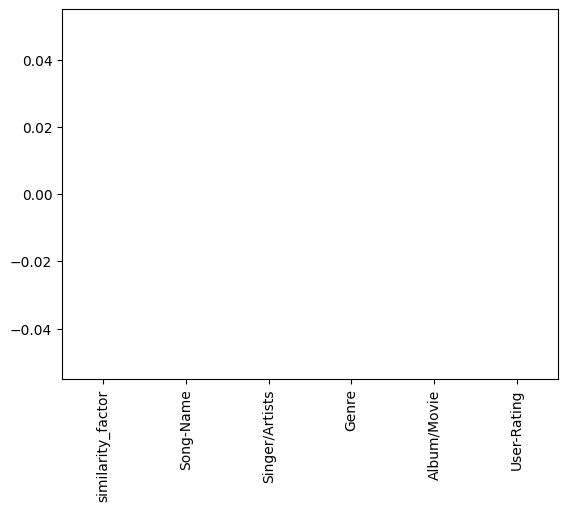

In [103]:
df.dropna(inplace = True)
df.isnull().sum().plot.bar()
plt.show()

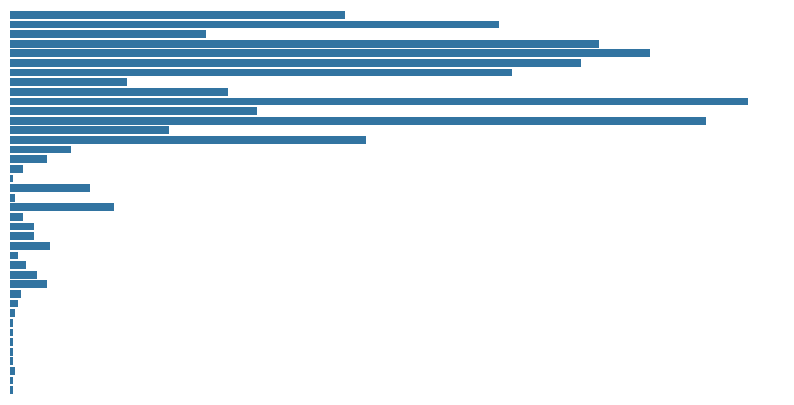

In [104]:
plt.figure(figsize = (10, 5))
sb.countplot(df['User-Rating'])
plt.axis('off')
plt.show()

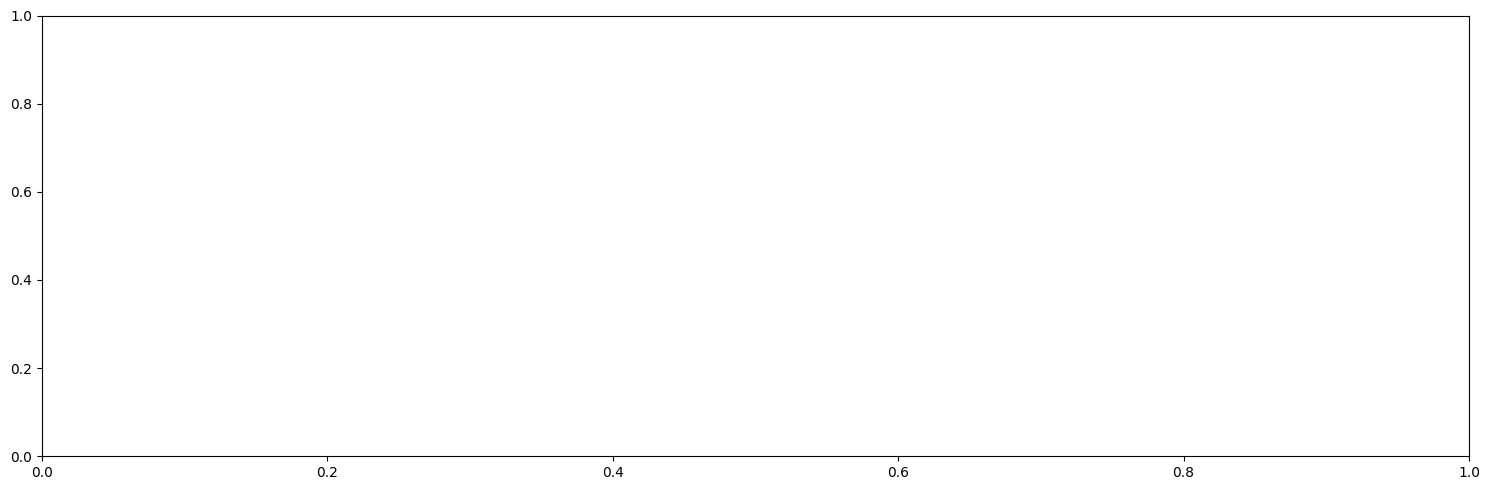

In [105]:
ur = []
for col in df.columns:
  if df[col].dtype == 'User-Rating':
    ur.append(col)
 
len(ur)
plt.subplots(figsize = (15, 5))
for i, col in enumerate(ur):
  plt.subplot(2, 5, i + 1)
  sb.distplot(df[col])
plt.tight_layout()
plt.show()

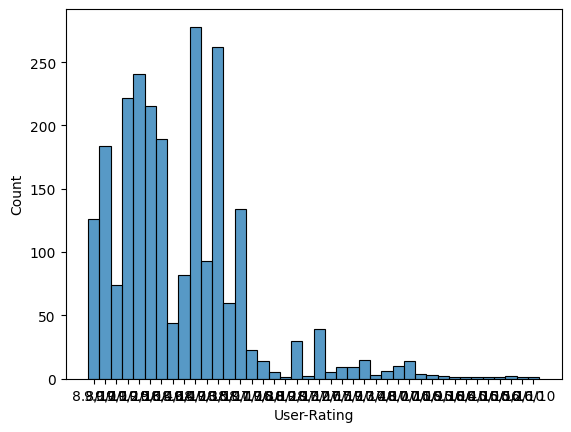

In [106]:
sb.histplot(x='User-Rating', data=df, )
plt.show()

In [107]:
df = df.sort_values(by=['User-Rating'], ascending=False).head(10000)

In [108]:
%%capture
song_vectorizer = CountVectorizer()
song_vectorizer.fit(df['Genre'])

In [72]:
def get_similarities(song_name, dt):
   
  text_array1 = song_vectorizer.transform(dt[dt['Song-Name']==song_name]['Genre']).toarray()
  num_array1 = dt[dt['Song-Name']==song_name].select_dtypes(include=np.number).to_numpy()
   
  sim = []
  for idx, row in dt.iterrows():
    name = row['Song-Name']
     
    text_array2 = song_vectorizer.transform(dt[dt['Song-Name']==name]['Genre']).toarray()
    num_array2 = dt[dt['Song-Name']==name].select_dtypes(include=np.number).to_numpy()
 
    text_sim = cosine_similarity(text_array1, text_array2)[0][0]
    num_sim = cosine_similarity(num_array1, num_array2)[0][0]
    sim.append(text_sim + num_sim)
     
  return sim

In [91]:
def recommend_songs(song_name, dt=df):
  if df[df['Song-Name'] == song_name].shape[0] == 0:
    print('This song is not available in your wishlist')
     
    for song in dt.sample(n=5)['Song-Name'].values:
      print(song)
    return
   
  dt['similarity_factor'] = get_similarities(song_name, dt)
 
  dt.sort_values(by=['similarity_factor', 'User-Rating'],
                   ascending = [False, False],
                   inplace=True)

  display(dt[['Song-Name', 'Singer/Artists']][2:7])

In [109]:
recommend_songs('Tum hi ho')

This song is not available in your wishlist
Party All Night
Kem Cho
Dilbar
Malang
Humsafar


In [92]:
recommend_songs('Jana Tumhare Pyar Mein')

,Song-Name,Singer/Artists
900,Roobaroo,"A.R. Rahman, Naresh Iyer"
1037,Main Aisa Kyun Hoon,Shaan
1038,Main Aisa Kyon Hoon,Shaan
1480,Kurbaan Hua,Vishal Dadlani
1628,Jannatein Kahan,K.K.
